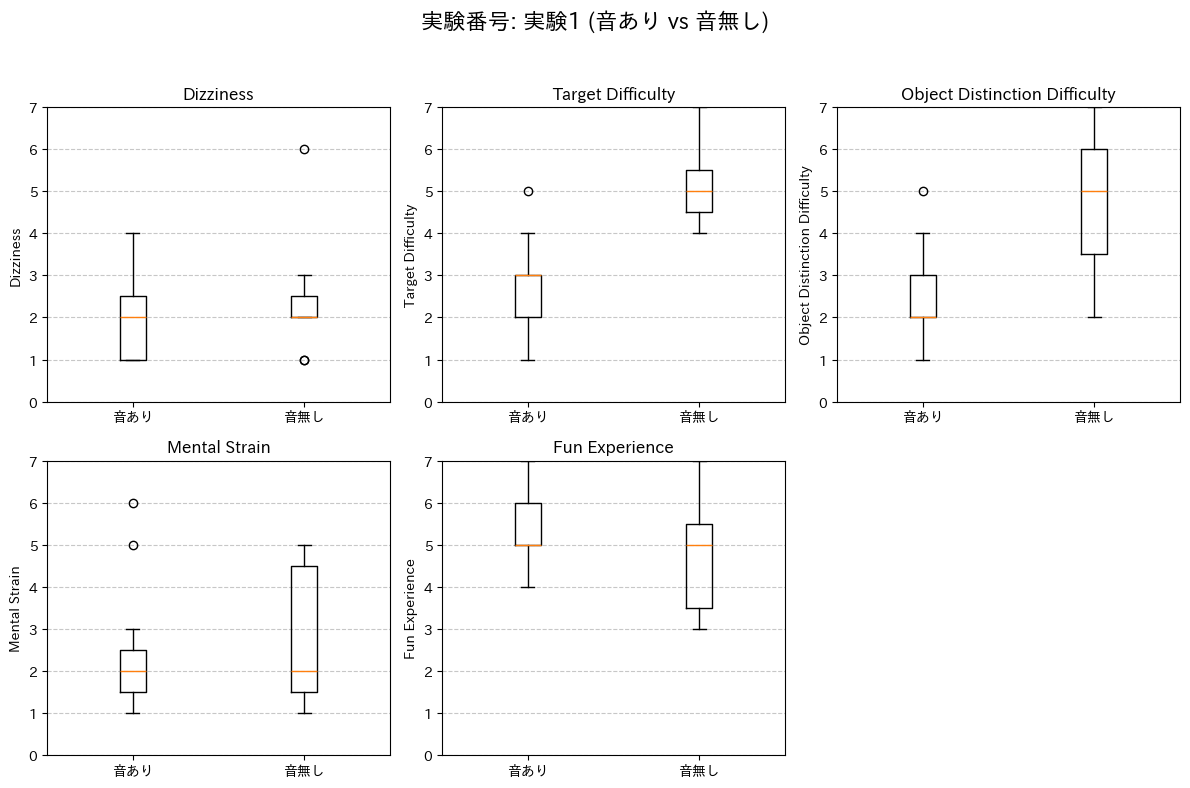

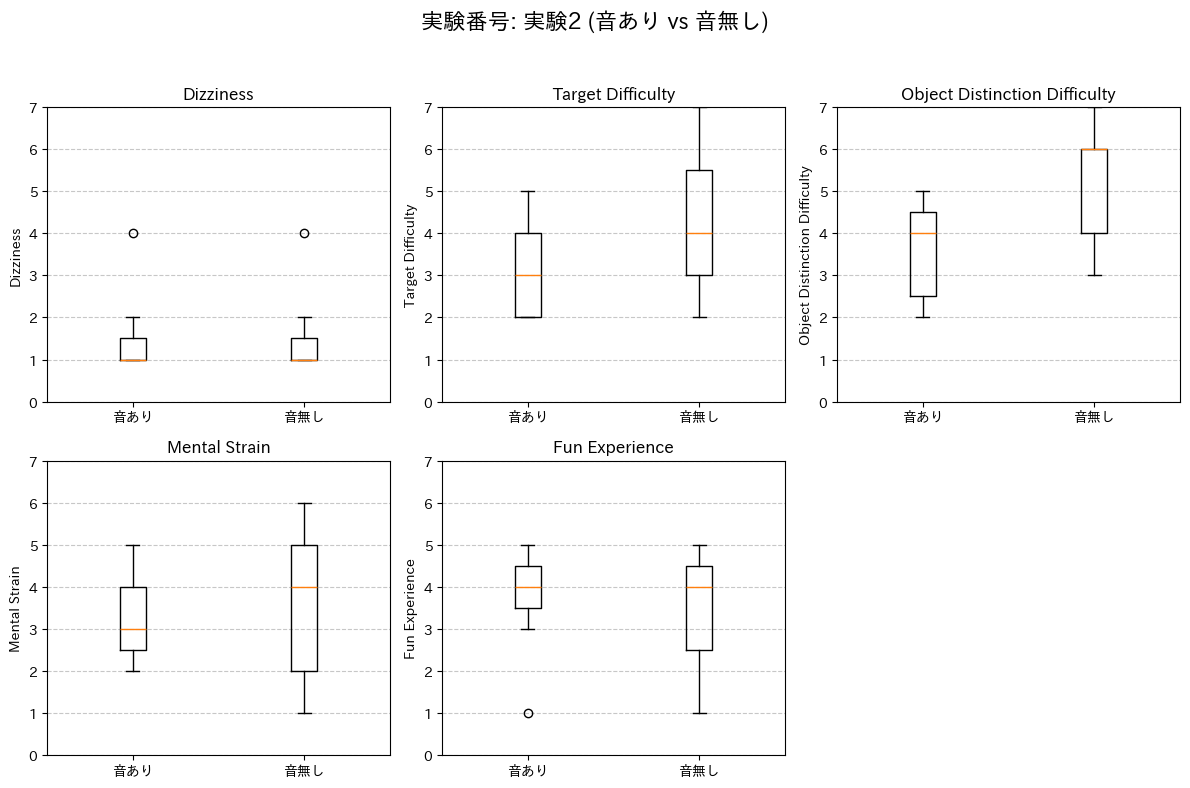

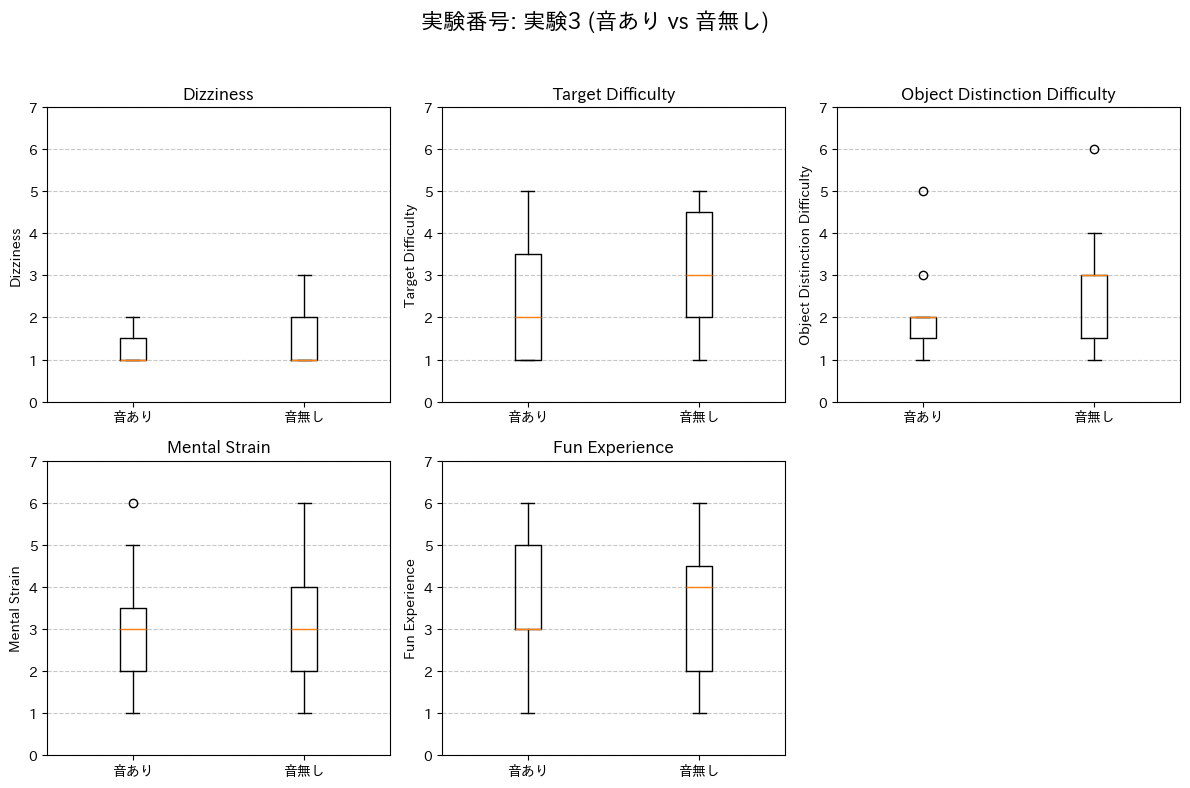

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import japanize_matplotlib

# Load and clean the data
file_path = '無題のフォーム（回答） - シート1 (3).csv'
data = pd.read_csv(file_path)
data.columns = data.columns.str.strip().str.replace('\n', '').str.replace(' ', '')

# Extract relevant columns
data_cleaned = data[['実験手順', '実験番号', 'どれくらい酔ったか？', 'どれくらいターゲットを取得するのが大変だったか？',
                     'どれくらい視野外物体の区別をするのが難しかったか？', '精神的にしんどかったですか？', 'どれくらい体験として楽しかったか？']]

data_cleaned.columns = ['Condition', 'Experiment', 'Dizziness', 'Target Difficulty', 'Object Distinction Difficulty', 
                        'Mental Strain', 'Fun Experience']

# Get unique experiment numbers
experiment_numbers = data_cleaned['Experiment'].unique()

# Metrics for evaluation
metrics = ['Dizziness', 'Target Difficulty', 'Object Distinction Difficulty', 'Mental Strain', 'Fun Experience']

# Plot metrics for each experiment number in a single graph
for experiment in experiment_numbers:
    experiment_data = data_cleaned[data_cleaned['Experiment'] == experiment]
    sound_on = experiment_data[experiment_data['Condition'] == '音あり']
    sound_off = experiment_data[experiment_data['Condition'] == '音無し']

    plt.figure(figsize=(12, 8))
    
    # Iterate through metrics and plot each as a subplot
    for i, metric in enumerate(metrics):
        plt.subplot(2, 3, i + 1)  # Arrange metrics in a 2x3 grid
        plt.boxplot([sound_on[metric].dropna(), sound_off[metric].dropna()], labels=['音あり', '音無し'])
        plt.title(metric)
        plt.ylabel(metric)
        plt.ylim(0, 7)
        plt.grid(axis='y', linestyle='--', alpha=0.7)
    
    # Set the overall title for the experiment
    plt.suptitle(f'実験番号: {experiment} (音あり vs 音無し)', fontsize=16)
    plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust layout to fit title
    plt.show()


C:\Users\takaharayota\AppData\Local\Temp\ipykernel_28496\3286594030.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['Condition'] = data_cleaned['Condition'].replace({


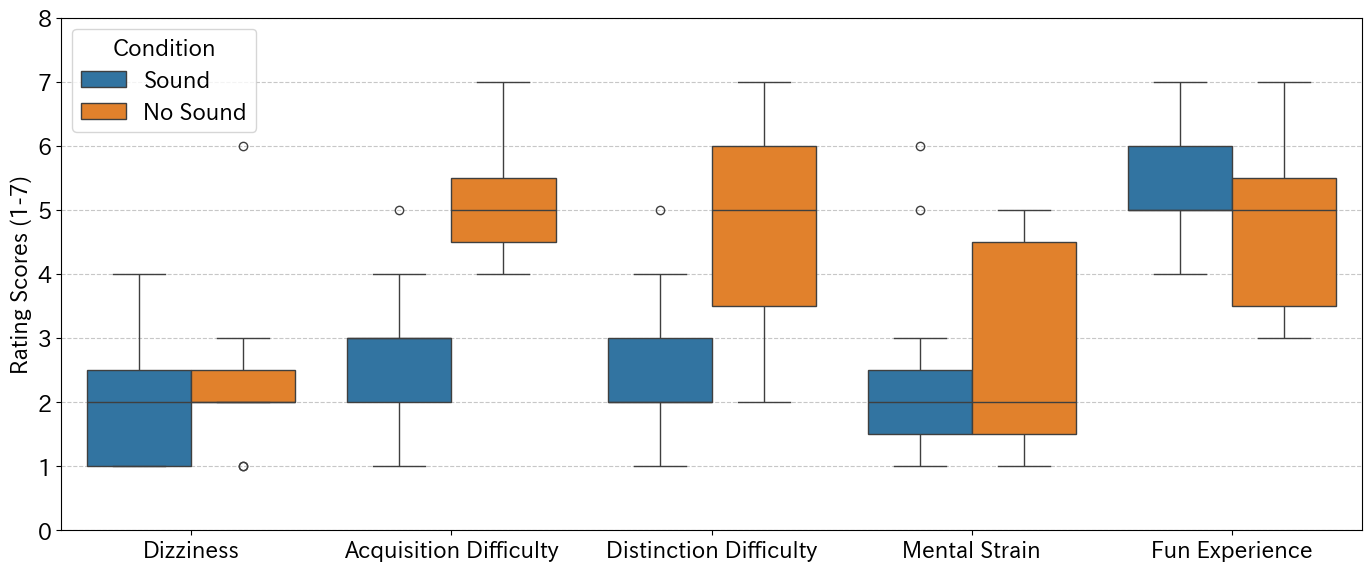

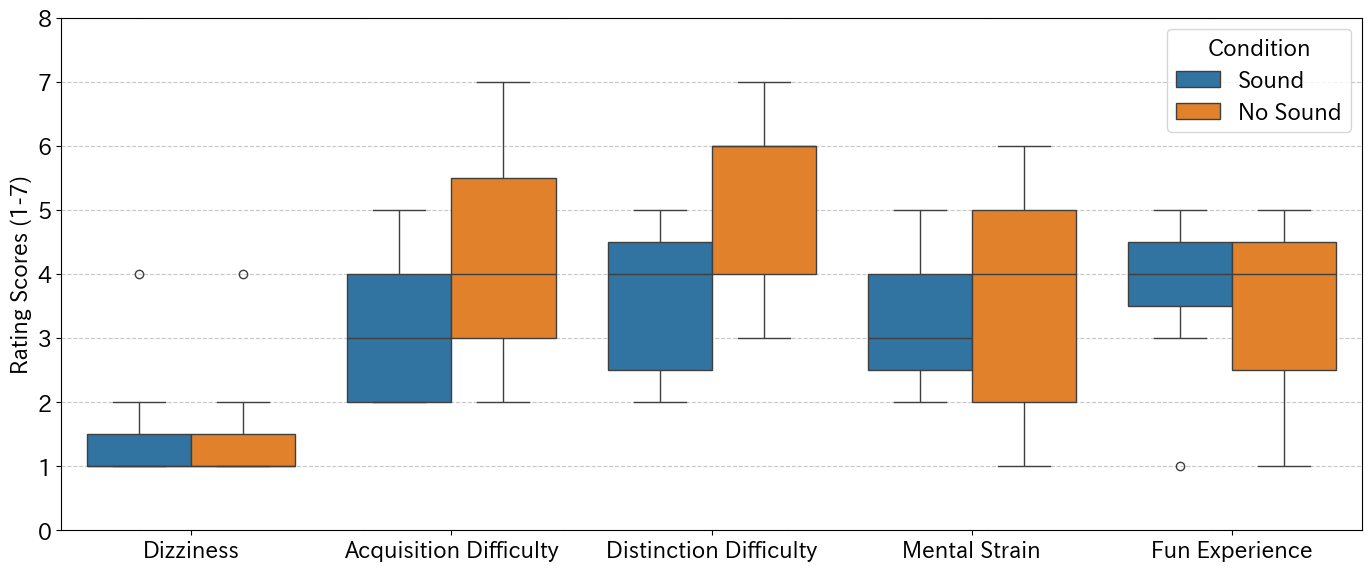

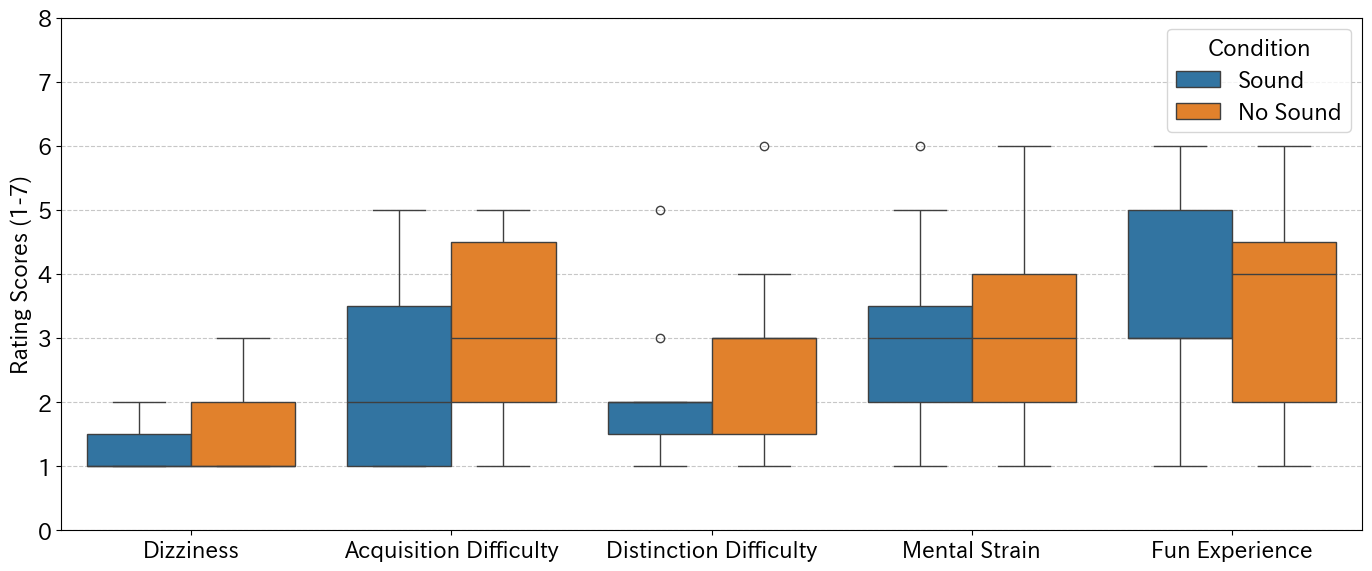

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import japanize_matplotlib

# Load and clean the data
file_path = '無題のフォーム（回答） - シート1 (3).csv'
data = pd.read_csv(file_path)
data.columns = data.columns.str.strip().str.replace('\n', '').str.replace(' ', '')

# Extract relevant columns
data_cleaned = data[['実験手順', '実験番号', 'どれくらい酔ったか？', 'どれくらいターゲットを取得するのが大変だったか？',
                     'どれくらい視野外物体の区別をするのが難しかったか？', '精神的にしんどかったですか？', 'どれくらい体験として楽しかったか？']]

# Rename columns in English for convenience
data_cleaned.columns = ['Condition', 'Experiment', 'Dizziness', 'Acquisition Difficulty', 
                        'Distinction Difficulty', 'Mental Strain', 'Fun Experience']

# ここで Condition の値をマッピングして、英語表記にする
data_cleaned['Condition'] = data_cleaned['Condition'].replace({
    '音あり': 'Sound',
    '音無し': 'No Sound'
})

# Get unique experiment numbers
experiment_numbers = data_cleaned['Experiment'].unique()

# Metrics for evaluation
metrics = ['Dizziness', 'Acquisition Difficulty', 'Distinction Difficulty', 'Mental Strain', 'Fun Experience']

# ---- ① melt でデータを縦持ちに整形する ----
long_data = data_cleaned.melt(
    id_vars=['Condition', 'Experiment'],
    value_vars=metrics,
    var_name='Metric', 
    value_name='Value'
)

# ---- ② 実験番号ごとにプロット ----
for experiment in experiment_numbers:
    # その実験番号だけ抽出
    experiment_data = long_data[long_data['Experiment'] == experiment]
    
    plt.figure(figsize=(14, 6))
    sns.boxplot(x='Metric', y='Value', hue='Condition', data=experiment_data)
    
    plt.title('')
    plt.ylabel('Rating Scores (1-7)')
    plt.xlabel('')
    plt.ylim(0, 8)
    # plt.xticks(rotation=30)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.legend(title='Condition', loc='best')
    plt.tight_layout()
    plt.show()
